# 📦 DoorDash Delivery Operations – Exploratory Data Analysis (EDA)
## 📍 Project Overview

#### ***This project performs Exploratory Data Analysis (EDA) on food delivery data from DoorDash to analyze delivery performance, demand, reviews & rating pattern.***

### Import All Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Charts
import seaborn as sns #tree chart/matrix advanced level of chart
import plotly.express as px
import plotly.graph_objects as go

### Import Dataset

In [4]:
df = pd.read_csv('D:/Envision Learning/Python/dataset/doordash.csv', encoding='unicode-escape')

In [5]:
df.shape

(3290, 10)

In [6]:
df.columns

Index(['Unnamed: 0', 'restaurant', 'url', 'distance', 'star', 'num_reviews',
       'city', 'price_range', 'category_1', 'category_2'],
      dtype='str')

In [9]:
df.head(10)

,Unnamed: 0,restaurant,url,distance,star,num_reviews,city,price_range,category_1,category_2
0,0,Sector 17,https://www.doordash.com/store/884779/?pickup=...,0.90,4.0,640.0,Branpton,$$,Indian,Wraps
1,1,Golden Palace Restaurant,https://www.doordash.com/store/332454/?pickup=...,2.00,4.0,301.0,Branpton,$$,Chinese,Chicken
2,2,McDonald's,https://www.doordash.com/store/1140537/?pickup...,1.00,4.2,890.0,Branpton,$$,Bakery,Chicken
3,3,San Francisco Place,https://www.doordash.com/store/205349/?pickup=...,0.40,4.4,109.0,Branpton,$,Italian,Sandwiches
4,4,THE BURGER BROS,https://www.doordash.com/store/940617/?pickup=...,0.09,4.5,481.0,Branpton,$$,Fast Food,Sandwiches
5,5,Lazeez Shawarma,https://www.doordash.com/store/567102/?pickup=...,0.90,3.7,730.0,Branpton,$$,Shawarma,Vegetarian
6,6,Fresh Tandoori,https://www.doordash.com/store/303233/?pickup=...,0.90,3.8,1400.0,Branpton,$$,Indian,Vegetarian
7,7,Henry's Fish & Chips,https://www.doordash.com/store/443240/?pickup=...,0.70,4.5,293.0,Branpton,$$,Fish & Chips,Seafood
8,8,Pho Viet Nam Restaurant,https://www.doordash.com/store/205291/?pickup=...,0.04,4.2,50.0,Branpton,$$,Vietnamese,Pho
9,9,Church's Chicken Canada,https://www.doordash.com/store/872402/?pickup=...,1.90,4.0,1700.0,Branpton,$,Wraps,Tenders


In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3290 non-null   int64  
 1   restaurant   3290 non-null   str    
 2   url          3290 non-null   str    
 3   distance     3290 non-null   float64
 4   star         3010 non-null   float64
 5   num_reviews  2620 non-null   float64
 6   city         3290 non-null   str    
 7   price_range  3290 non-null   str    
 8   category_1   3290 non-null   str    
 9   category_2   3182 non-null   str    
dtypes: float64(3), int64(1), str(6)
memory usage: 257.2 KB


### Cleaning Data

In [15]:
#drop unrelated columns/blank columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)
#axis=1 vertical column
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   3290 non-null   str    
 1   url          3290 non-null   str    
 2   distance     3290 non-null   float64
 3   star         3010 non-null   float64
 4   num_reviews  2620 non-null   float64
 5   city         3290 non-null   str    
 6   price_range  3290 non-null   str    
 7   category_1   3290 non-null   str    
 8   category_2   3182 non-null   str    
dtypes: float64(3), str(6)
memory usage: 231.5 KB


In [16]:
pd.isnull(df).sum()

restaurant       0
url              0
distance         0
star           280
num_reviews    670
city             0
price_range      0
category_1       0
category_2     108
dtype: int64

In [17]:
#drop null values 
df.dropna(inplace = True)
df.shape

(2570, 9)

In [20]:
#Rename branpton to brampton
df['city'] = df['city'].replace({
    'Branpton': 'Brampton'
})

In [18]:
df.columns

Index(['restaurant', 'url', 'distance', 'star', 'num_reviews', 'city',
       'price_range', 'category_1', 'category_2'],
      dtype='str')

# Exploratory Data Analysis - EDA
### 1. City:

In [8]:
count_city = df.groupby(['city'], as_index= False)['restaurant'].count()
count_city


,city,restaurant
0,Branpton,118
1,Calgary,367
2,Edmonton,265
3,Montreal,568
4,Ottawa,238
5,Toronto,843
6,Vancouver,694
7,Winnipeg,197


In [32]:
max_count = count_city['restaurant'].max()
filtered_df = count_city[count_city['restaurant'] == max_count]
print(filtered_df)

      city  restaurant
5  Toronto         609


In [37]:
print(f"Max no of resturants : {filtered_df['city'].values} & count : {filtered_df['restaurant'].values}")

Max no of resturants : <StringArray>
['Toronto']
Length: 1, dtype: str & count : [609]


#### ***KPI 1 : Toronto has highest no of restaurants.***

### 2. Reviews:

In [38]:
df.columns

Index(['restaurant', 'url', 'distance', 'star', 'num_reviews', 'city',
       'price_range', 'category_1', 'category_2'],
      dtype='str')

In [41]:
reviews = df.groupby(['city'], as_index= False)['num_reviews'].sum().sort_values('num_reviews', ascending =False).head(1)
print(f"Max no of reviews: {reviews['city'].values} & No of reviews: {reviews['num_reviews'].values}")

Max no of reviews: <StringArray>
['Vancouver']
Length: 1, dtype: str & No of reviews: [512093.]


#### ***KPI 2 : Vancouver has highest no of reviews.***

### 3. Ratings

In [52]:
ratings = df.groupby(['city'], as_index= False)['star'].mean().sort_values('star', ascending =False).head(1)
print(f"Average rating: {ratings['city'].values} & Avg Rating: {ratings['star'].values}")

Average rating: <StringArray>
['Vancouver']
Length: 1, dtype: str & Avg Rating: [4.55662651]


#### ***KPI 3 : Vancouver has highest avg rating.***

## Charts:

#### 1. Restaurants Distribution in Distance Category- ***Short, Medium & Long Distance***

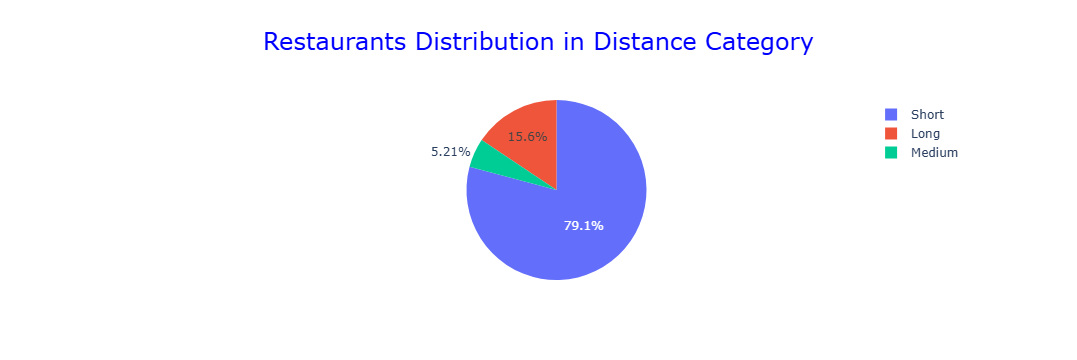

In [64]:
df['distance_category'] = pd.cut(df['distance'], 
                        bins=[0, 10, 20, float('inf')], 
                        labels=['Short', 'Medium', 'Long'])
distance_cat = df.groupby(['distance_category'], as_index=False)['restaurant'].count()

# plotting the pie chart
fig = px.pie(distance_cat, values="restaurant", names="distance_category",title='**Restaurants Distribution in Distance Category**') 
fig.update_layout(
    title={
        'text': 'Restaurants Distribution in Distance Category',
        'font': {'size': 24, 'color': 'blue'},
        'x': 0.5, # Centers the title (0.5 is the center of the plot area)
        'xanchor': 'center'
    }
)
# showing the plot
fig.show()

#### 2. Number of Restaurants registered on DoorDash by cities in Canada

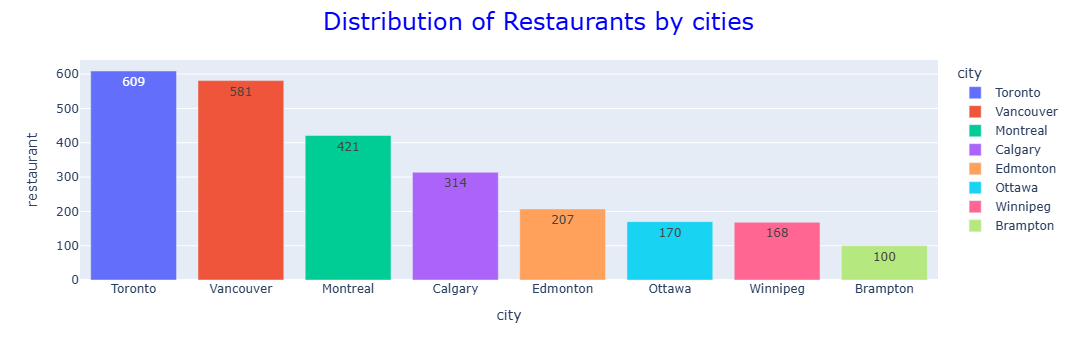

In [70]:
city_restaurant = df.groupby(['city'], as_index= False)['restaurant'].count().sort_values('restaurant', ascending= False)
# plotting the bar chart
fig = px.bar(city_restaurant, x="city", y="restaurant",  color='city', text_auto=True) 
fig.update_layout(
    title={
        'text': 'Distribution of Restaurants by cities',
        'font': {'size': 24, 'color': 'blue'},
        'x': 0.5, # Centers the title (0.5 is the center of the plot area)
        'xanchor': 'center'
    }
)
fig.show()

#### 3. Reviews distribution by cities:

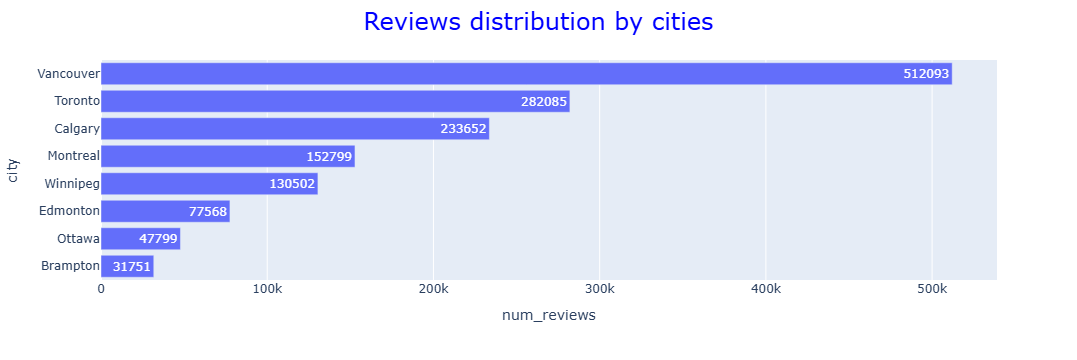

In [78]:
reviews_city = df.groupby(['city'], as_index= False)['num_reviews'].sum().sort_values('num_reviews', ascending =True)
# plotting the bar chart
fig = px.bar(reviews_city, x="num_reviews", y="city" ,text_auto=True, text='num_reviews') 
fig.update_traces(texttemplate="%{text:.0f}")
fig.update_layout(
    title={
        'text': 'Reviews distribution by cities',
        'font': {'size': 24, 'color': 'blue'},
        'x': 0.5, # Centers the title (0.5 is the center of the plot area)
        'xanchor': 'center'
    }
)
# showing the plot
fig.show()

#### 3. Average Rating distribution by cities:

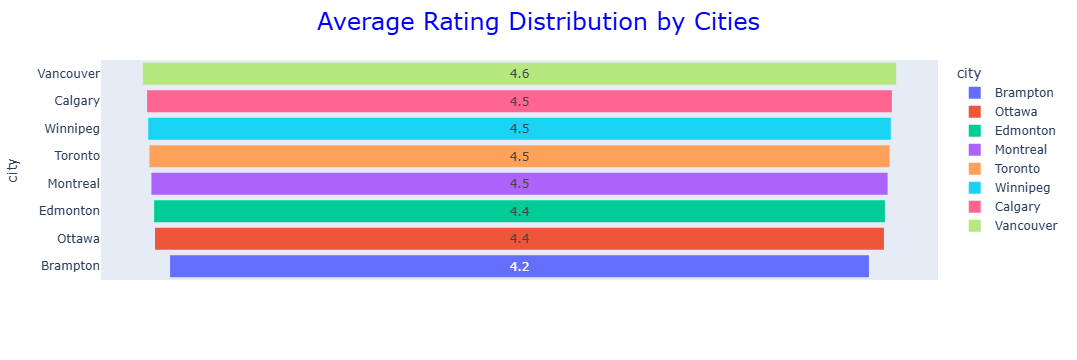

In [123]:
ratings_city = df.groupby(['city'], as_index= False)['star'].mean().sort_values('star', ascending =True)
# Create funnel
fig = px.funnel(ratings_city, x='star', y='city', text='star', color='city')
fig.update_traces(texttemplate="%{text:.1f}")
fig.update_layout(
    title={
        'text': 'Average Rating Distribution by Cities',
        'font': {'size': 24, 'color': 'blue'},
        'x': 0.5, # Centers the title (0.5 is the center of the plot area)
        'xanchor': 'center'
    }
)
# Display the figure
fig.show()

#### 4. Price-Category ***('Budget', 'Medium' & 'Premium')*** Distribution by Cities:

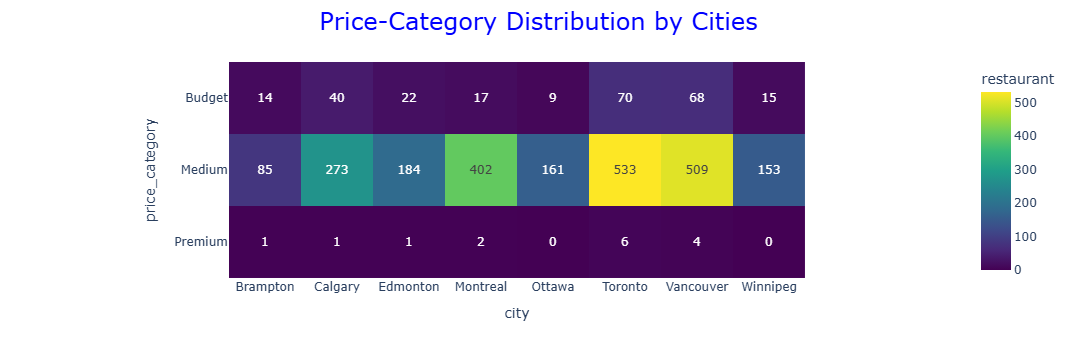

In [124]:
conditions= [
    (df['price_range']=='$'),
    (df['price_range']=='$$'),
    (df['price_range']=='$$$') | (df['price_range']=='$$$$')
]
choices = ['Budget', 'Medium', 'Premium']
df['price_category'] = np.select(conditions, choices, default='Budget') 
price_cat = df.groupby(['price_category','city'])['restaurant'].count().sort_values(ascending = False).reset_index()
# Create matrix for heatmapdata
heatmap_data = price_cat.pivot(index='price_category', columns='city', values='restaurant').fillna(0)
#  Create Heatmap
fig = px.imshow(heatmap_data, labels=dict(x="city", y="price_category", color="restaurant"),
                x=heatmap_data.columns,
                y=heatmap_data.index, 
                text_auto=True, # Optional: shows values in cells
                color_continuous_scale='Viridis')
fig.update_layout(
    title={
        'text': 'Price-Category Distribution by Cities',
        'font': {'size': 24, 'color': 'blue'},
        'x': 0.5, # Centers the title (0.5 is the center of the plot area)
        'xanchor': 'center'
    }
)
fig.show()




#### 5. Delivery Distribution by Distance ***(Short, Medium & Long)***:

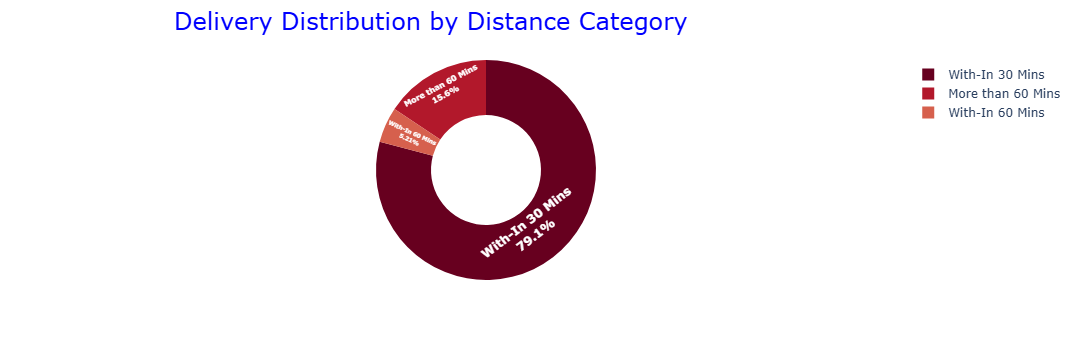

In [153]:

distance_cat_city = df.groupby(['distance_category','city'], as_index=False)['restaurant'].count()
conditions= [
    (distance_cat_city['distance_category']=='Short'),
    (distance_cat_city['distance_category']=='Medium'),
    (distance_cat_city['distance_category']=='Long')
]
choices = ['With-In 30 Mins', 'With-In 60 Mins', 'More than 60 Mins']
distance_cat_city['delivery_range'] = np.select(conditions, choices, default='With-In 60 Mins') 

group_delivery_range = distance_cat_city.groupby(['delivery_range'], as_index= False)['restaurant'].sum().sort_values('restaurant', ascending =False).reset_index()
# Create the donut chart
fig = px.pie(
    group_delivery_range,
    values='restaurant',
    names='delivery_range',
    color_discrete_sequence=px.colors.sequential.RdBu,
    hole=0.5 # This creates the donut effect
)

# Optional: Customize the text displayed inside the slices
fig.update_traces(textposition='inside', textinfo='label+percent', 
                  textfont=dict(
                      color='white', # Set the font color to white
                      size=12,      # Optional: set font size
                      weight='bold' # Set the font weight to bold
                  ))
fig.update_layout(
    title={
        'text': 'Delivery Distribution by Distance Category',
        'font': {'size': 24, 'color': 'blue'},
        'x': 0.4, # Centers the title (0.5 is the center of the plot area)
        'xanchor': 'center'
    }
)
fig.show()


#### 6. Food Category ***(Veg/Non-Veg)*** Distribution:

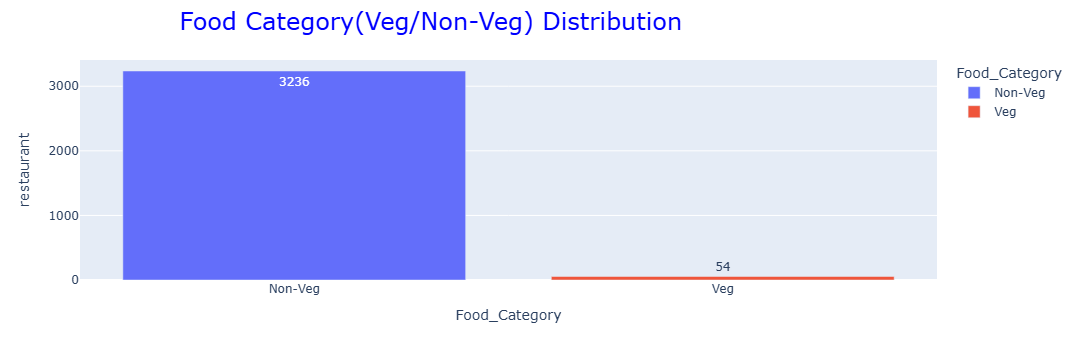

In [7]:
veg_keywords = ['vegan', 'vegetarian friendly', 'vegetarian options', 'vegetarian',
                    'vegan friendly', 'roti', 'rice','plant based', 'plants']

df['Food_Category'] = np.where(
                    df['category_1'].str.lower().str.contains("|".join(veg_keywords), na = False),
    'Veg',
    'Non-Veg')
food_revenue = (df.groupby('Food_Category', as_index= False)['restaurant'].count().reset_index())

# plotting the bar chart
fig = px.bar(food_revenue, x="Food_Category", y="restaurant",  color='Food_Category', text_auto=True) 

fig.update_layout(
    title={
        'text': 'Food Category(Veg/Non-Veg) Distribution',
        'font': {'size': 24, 'color': 'blue'},
        'x': 0.4, # Centers the title (0.5 is the center of the plot area)
        'xanchor': 'center'
    }
)
fig.show()

# Conclusion:


### 💡 Business Recommendations

#### ***1. Focus on delivery with-in 60 mins i.e Medium Distance Category.***

#### ***2. Optimize delivery zones to reduce long-distance orders.***

#### ***3. Focus on location which has less no of restaurants i.e brampton.***

#### ***4. Monitor as Demand on medium price category is high as compared to other price categories.***

#### ***5. Train staff on cleaning techniques & Restaurant hygiene is critical for reputation & attracting more customers so monitor locations with less no.of reviews or ask feedback from the customers.***